## Predicción

¿Se puede predecir la disponibilidad de estacionamiento?

In [1]:
PARKINGS = [
    "Gto-Alhondiga",
    "Gto-Alonso",
    "Gto-Hinojo",
    "Gto-SanPedro",
]

In [2]:
import pandas as pd

csv_path = "https://raw.githubusercontent.com/L4rralde/Parking_Lots/refs/heads/main/data/data.csv"

data = pd.read_csv(csv_path)
data = data.drop(columns=["Unnamed: 0"])
data["Fecha_Hora"] = pd.to_datetime(data["Fecha_Hora"])
data.set_index(["Fecha_Hora"], inplace=True)
means = data.mean()
stds = data.std()

data = (data - means)/stds

In [3]:
data["Dia_Semana"] = data.index.weekday
data["Hora"] = data.index.hour
data["Minuto"] = data.index.minute
data["Horas_Semana"] = data["Dia_Semana"]*24 + data["Hora"]
data["Minutos_Semana"] = data["Dia_Semana"]*1440 + data["Hora"]*60 + data["Minuto"]

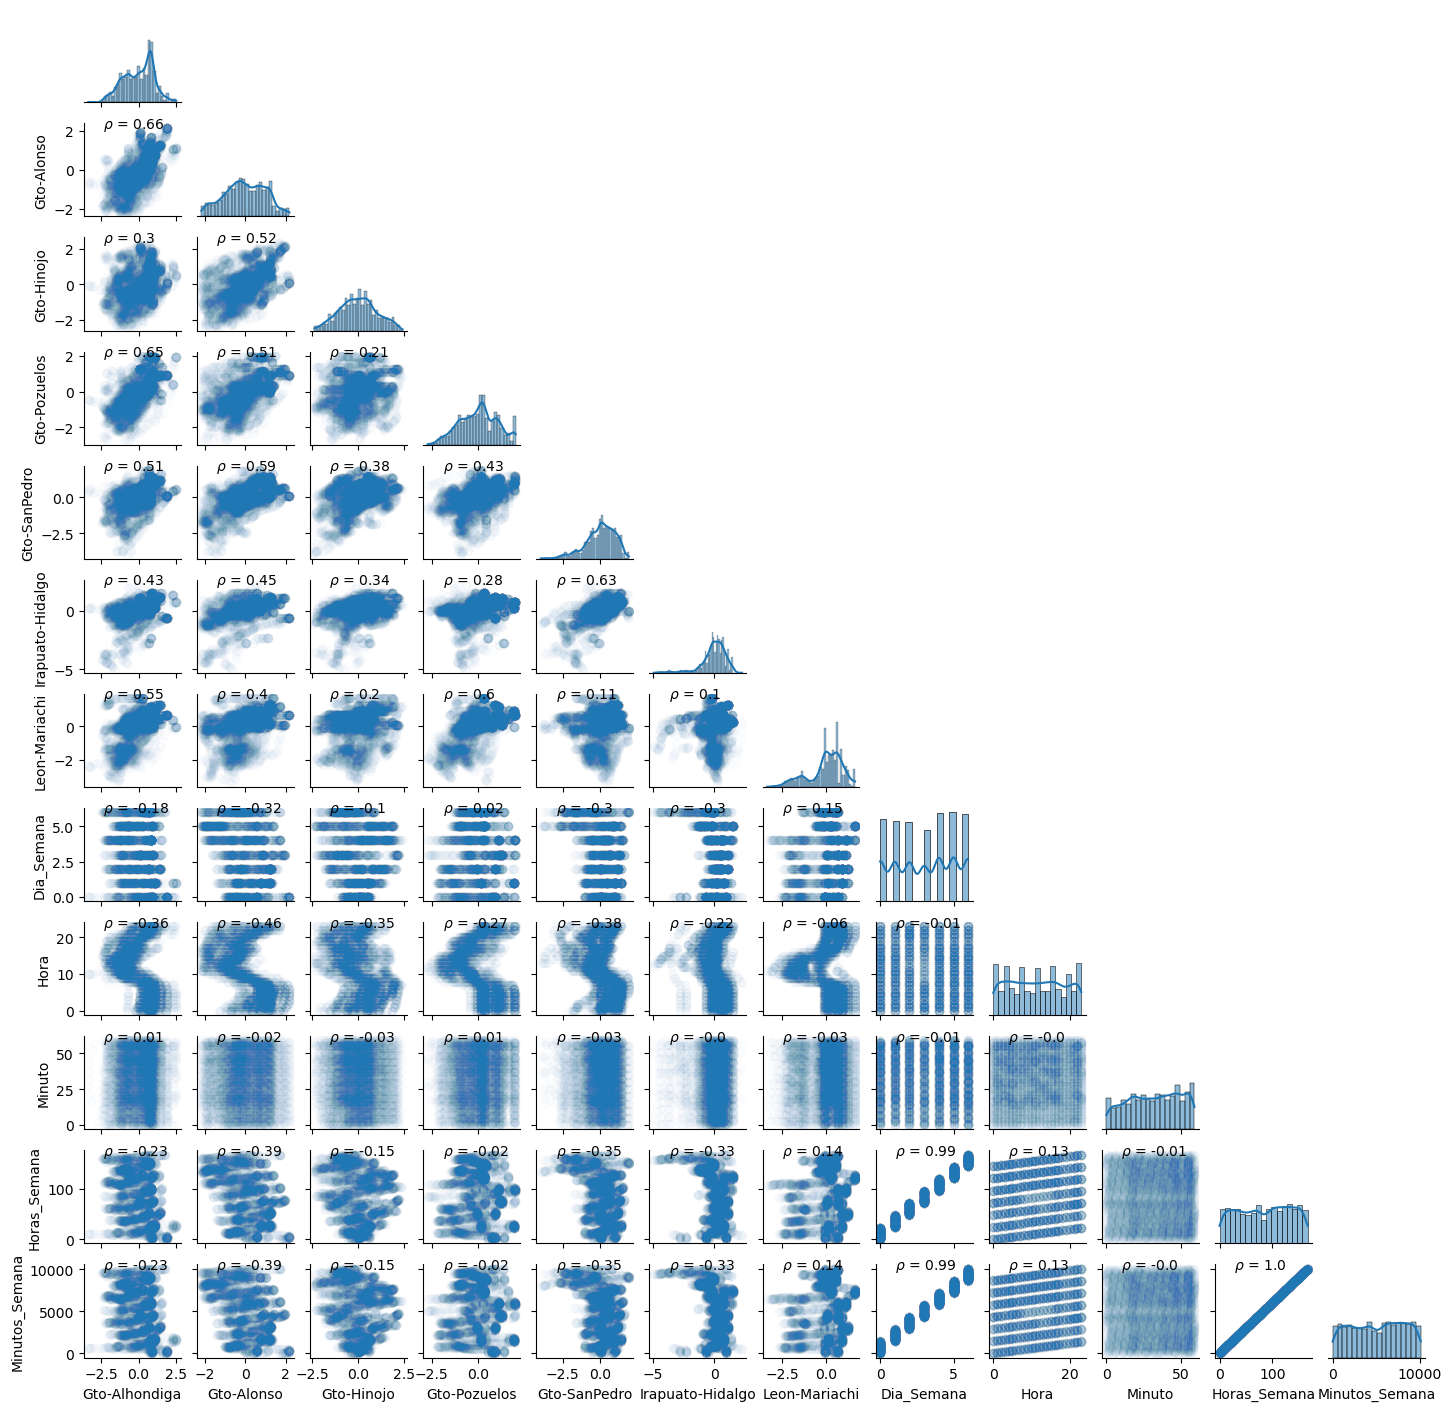

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 10, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data, height=1.2, corner=True)

# Map the plots to the locations
grid = grid.map_lower(corr)
grid = grid.map_lower(plt.scatter, alpha=0.01)
grid = grid.map_diag(sns.histplot, kde=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


train, test = train_test_split(data, test_size=0.2, shuffle=False)

In [6]:
train.columns

Index(['Gto-Alhondiga', 'Gto-Alonso', 'Gto-Hinojo', 'Gto-Pozuelos',
       'Gto-SanPedro', 'Irapuato-Hidalgo', 'Leon-Mariachi', 'Dia_Semana',
       'Hora', 'Minuto', 'Horas_Semana', 'Minutos_Semana'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

forest = RandomForestRegressor(
    n_estimators = 200,
    max_features = "sqrt",
    n_jobs = 4,
)

kf = KFold(n_splits=10, shuffle=False)
folds = [
    (train.iloc[train_idx], train.iloc[val_idx])
    for train_idx, val_idx in kf.split(train)
]

['Dia_Semana', 'Hora', 'Minuto'] ['Gto-Alonso']
train mse: 1.8943234929780561
val mse: 0.5334307435809396


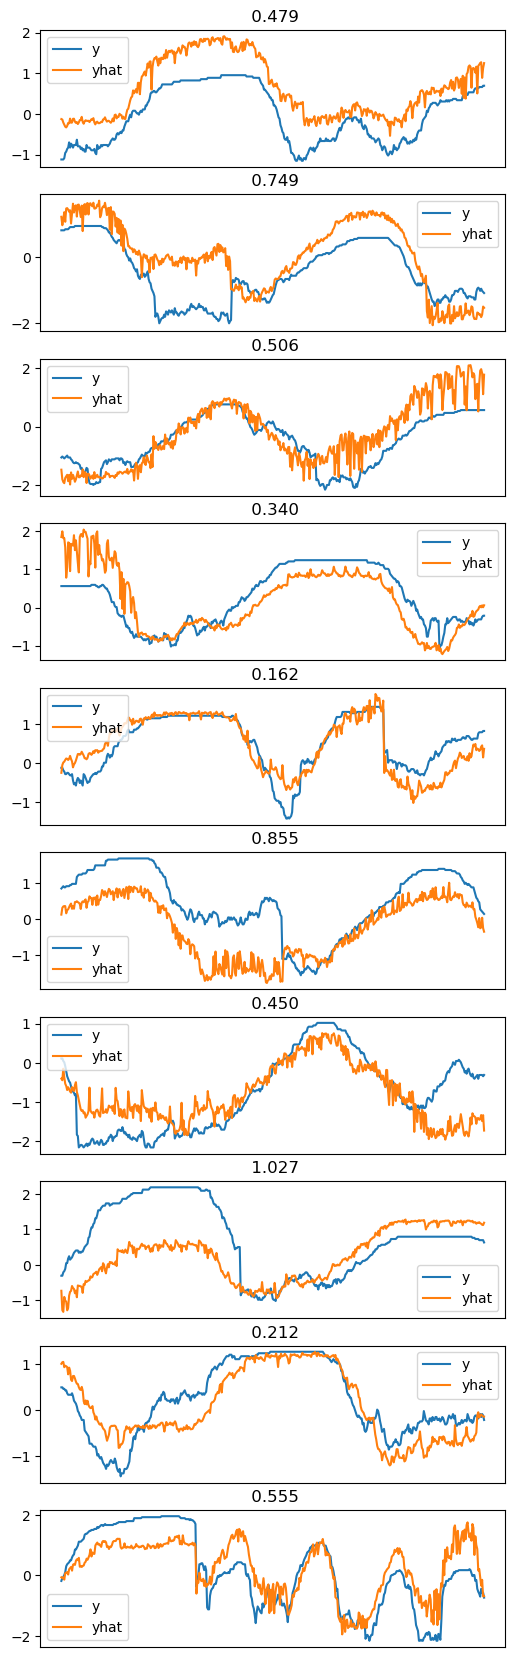

In [18]:
predictors = ["Dia_Semana", "Hora", "Minuto"]
response = ["Gto-Alonso"]

fig, axs = plt.subplots(10, 1, figsize=(6, 21))
print(predictors, response)
train_mse_acc = 0
mse_acc = 0
for i, (train_set, val_set) in enumerate(folds):
    forest.fit(train_set[predictors], train_set[response].values.ravel())
    y = val_set[response].values.ravel()
    yhat = forest.predict(val_set[predictors])
    mse = ((y - yhat)**2).mean()
    axs[i].plot(y, label='y')
    axs[i].plot(yhat, label='yhat')
    axs[i].legend()
    axs[i].set_title(f"{mse: .3f}")
    axs[i].set_xticks([])
    mse_acc += 0.1*mse
    train_mse_acc += 0.1 * (
        (train_set[response].values - forest.predict(train_set[predictors]))**2
    ).mean()
print(f"train mse: {train_mse_acc}")
print(f"val mse: {mse_acc}")

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/var/folders/y8/gfw8crg95jdf0ymxjbqm7hlm0000gn/T/ipykernel_17386/785624006.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(y.index, yhat*stds[response].values.ravel() + means[response].values.ravel(), label='$\hat y$', alpha=0.8)


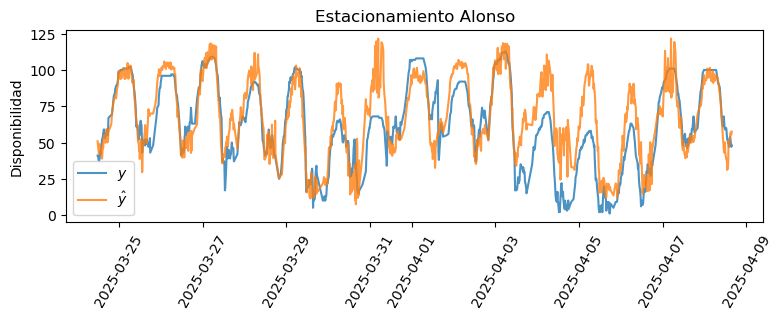

['Dia_Semana', 'Hora', 'Minuto'] 0.3446014755499608


In [9]:
forest.fit(train[predictors], train[response].values.ravel())
y = test[response]
yhat = forest.predict(test[predictors])
mse = ((y.values.ravel() - yhat)**2).mean()


plt.figure(figsize=(9, 2.5))
plt.plot(y.index, (y*stds + means)[response].values.ravel(), label='$y$', alpha=0.8)
plt.plot(y.index, yhat*stds[response].values.ravel() + means[response].values.ravel(), label='$\hat y$', alpha=0.8)
plt.xticks(rotation=60)

plt.title("Estacionamiento Alonso")
plt.ylabel("Disponibilidad")
plt.legend()
plt.savefig("media/random_forest_base.jpeg")
plt.show()

print(predictors, mse)

In [10]:
print(predictors)
print

['Dia_Semana', 'Hora', 'Minuto']


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

['Dia_Semana', 'Hora', 'Minuto', 'Gto-SanPedro'] ['Gto-Alonso']
train mse: 2.0111436776373495
val mse: 0.4729282577273194


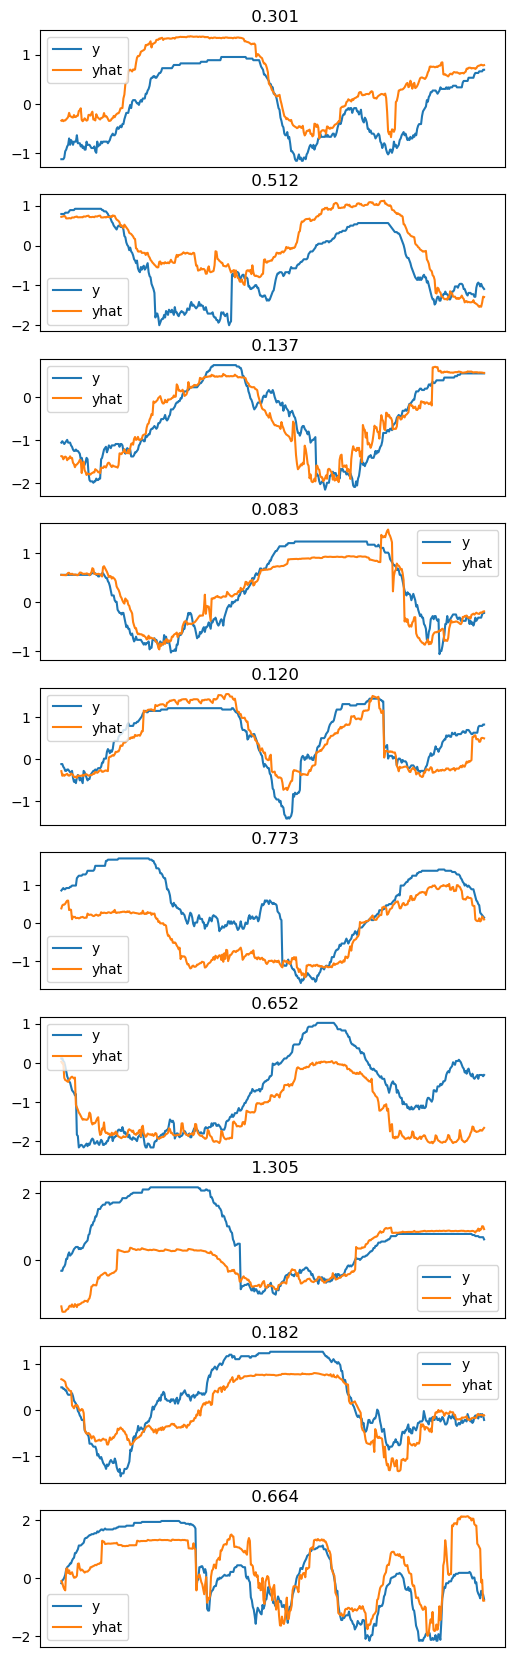

In [19]:
predictors = ["Dia_Semana", "Hora", "Minuto", "Gto-SanPedro"]
response = ["Gto-Alonso"]

fig, axs = plt.subplots(10, 1, figsize=(6, 21))
print(predictors, response)
train_mse_acc = 0
mse_acc = 0
for i, (train_set, val_set) in enumerate(folds):
    forest.fit(train_set[predictors], train_set[response].values.ravel())
    y = val_set[response].values.ravel()
    yhat = forest.predict(val_set[predictors])
    mse = ((y - yhat)**2).mean()
    axs[i].plot(y, label='y')
    axs[i].plot(yhat, label='yhat')
    axs[i].legend()
    axs[i].set_title(f"{mse: .3f}")
    axs[i].set_xticks([])
    mse_acc += 0.1*mse
    train_mse_acc += 0.1 * (
        (train_set[response].values - forest.predict(train_set[predictors]))**2
    ).mean()
print(f"train mse: {train_mse_acc}")
print(f"val mse: {mse_acc}")

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/var/folders/y8/gfw8crg95jdf0ymxjbqm7hlm0000gn/T/ipykernel_17386/1308737342.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(y.index, yhat*stds[response].values.ravel() + means[response].values.ravel(), label='$\hat y$', alpha=0.8)


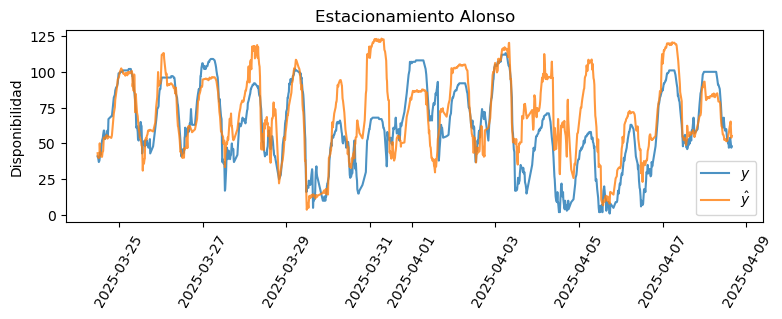

['Dia_Semana', 'Hora', 'Minuto', 'Gto-SanPedro'] 0.5245738059887078


In [12]:
forest.fit(train[predictors], train[response].values.ravel())
y = test[response]
yhat = forest.predict(test[predictors])
mse = ((y.values.ravel() - yhat)**2).mean()


plt.figure(figsize=(9, 2.5))
plt.plot(y.index, (y*stds + means)[response].values.ravel(), label='$y$', alpha=0.8)
plt.plot(y.index, yhat*stds[response].values.ravel() + means[response].values.ravel(), label='$\hat y$', alpha=0.8)
plt.xticks(rotation=60)

plt.title("Estacionamiento Alonso")
plt.ylabel("Disponibilidad")
plt.legend()
plt.savefig("media/random_forest_sanpedro.jpeg")
plt.show()

print(predictors, mse)

['Dia_Semana', 'Hora', 'Minuto', 'Gto-SanPedro', 'Gto-Hinojo'] ['Gto-Alonso']
train mse: 2.0167859916208797
val mse: 0.3941347342060476


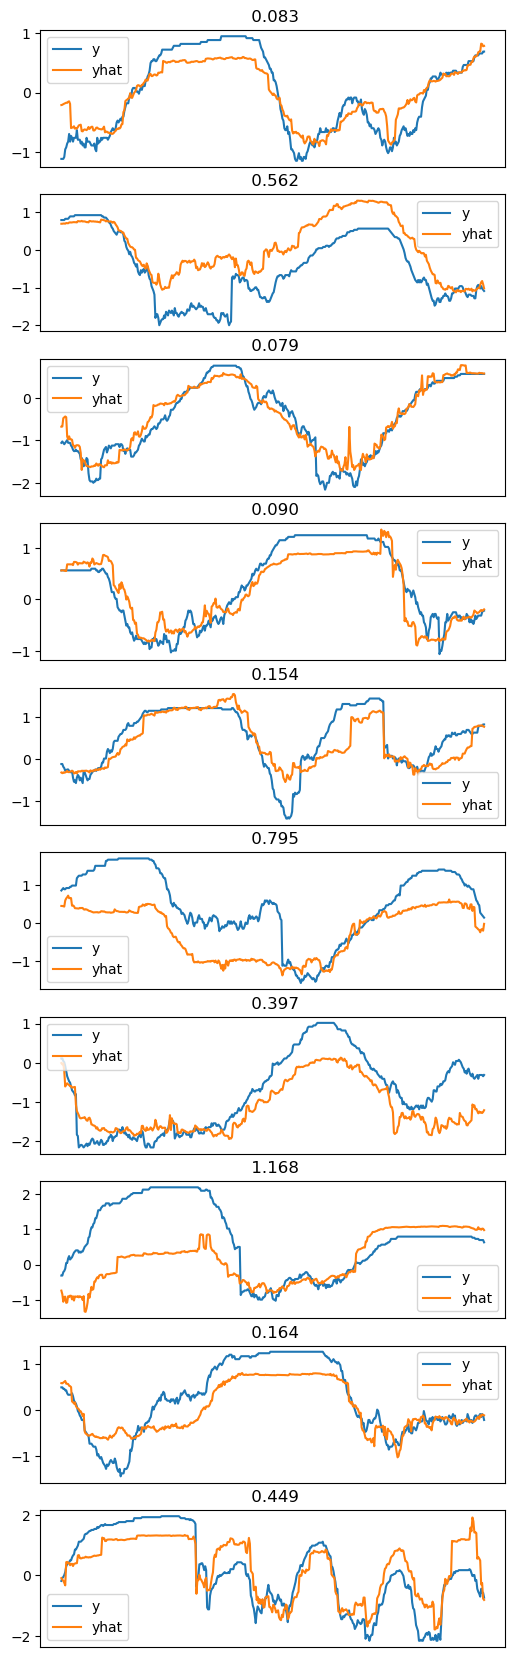

In [20]:
predictors = ["Dia_Semana", "Hora", "Minuto", "Gto-SanPedro", "Gto-Hinojo"]
response = ["Gto-Alonso"]

fig, axs = plt.subplots(10, 1, figsize=(6, 21))
print(predictors, response)
train_mse_acc = 0
mse_acc = 0
for i, (train_set, val_set) in enumerate(folds):
    forest.fit(train_set[predictors], train_set[response].values.ravel())
    y = val_set[response].values.ravel()
    yhat = forest.predict(val_set[predictors])
    mse = ((y - yhat)**2).mean()
    axs[i].plot(y, label='y')
    axs[i].plot(yhat, label='yhat')
    axs[i].legend()
    axs[i].set_title(f"{mse: .3f}")
    axs[i].set_xticks([])
    mse_acc += 0.1*mse
    train_mse_acc += 0.1 * (
        (train_set[response].values - forest.predict(train_set[predictors]))**2
    ).mean()
print(f"train mse: {train_mse_acc}")
print(f"val mse: {mse_acc}")

<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
/var/folders/y8/gfw8crg95jdf0ymxjbqm7hlm0000gn/T/ipykernel_17386/2333770935.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(y.index, yhat*stds[response].values.ravel() + means[response].values.ravel(), label='$\hat y$', alpha=0.8)


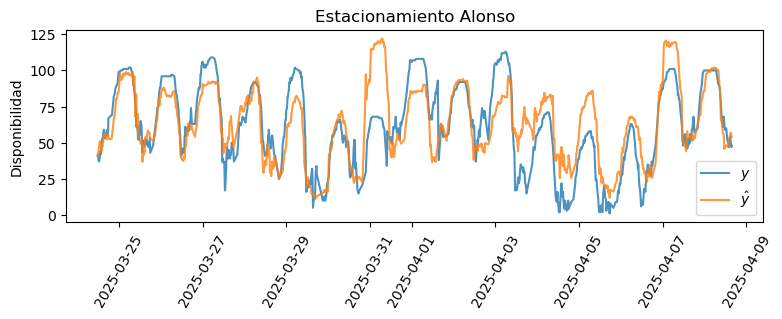

['Dia_Semana', 'Hora', 'Minuto', 'Gto-SanPedro', 'Gto-Hinojo'] 0.37659468268450824


In [14]:
forest.fit(train[predictors], train[response].values.ravel())
y = test[response]
yhat = forest.predict(test[predictors])
mse = ((y.values.ravel() - yhat)**2).mean()


plt.figure(figsize=(9, 2.5))
plt.plot(y.index, (y*stds + means)[response].values.ravel(), label='$y$', alpha=0.8)
plt.plot(y.index, yhat*stds[response].values.ravel() + means[response].values.ravel(), label='$\hat y$', alpha=0.8)
plt.xticks(rotation=60)

plt.title("Estacionamiento Alonso")
plt.ylabel("Disponibilidad")
plt.legend()
plt.savefig("media/random_forest_sanpedro_hinojo.jpeg")
plt.show()

print(predictors, mse)

val mse: 0.3941347342060476
